# opencv

In [13]:
import cv2

cap = cv2.VideoCapture(0)
while True:
    # 读取摄像头图像
    ret, frame = cap.read()
    if not ret:
        break

    # 展示图像
    cv2.imshow('Camera', frame)

    # 按'q'退出
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 释放摄像头资源
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 


![1](1.png "可选的标题")

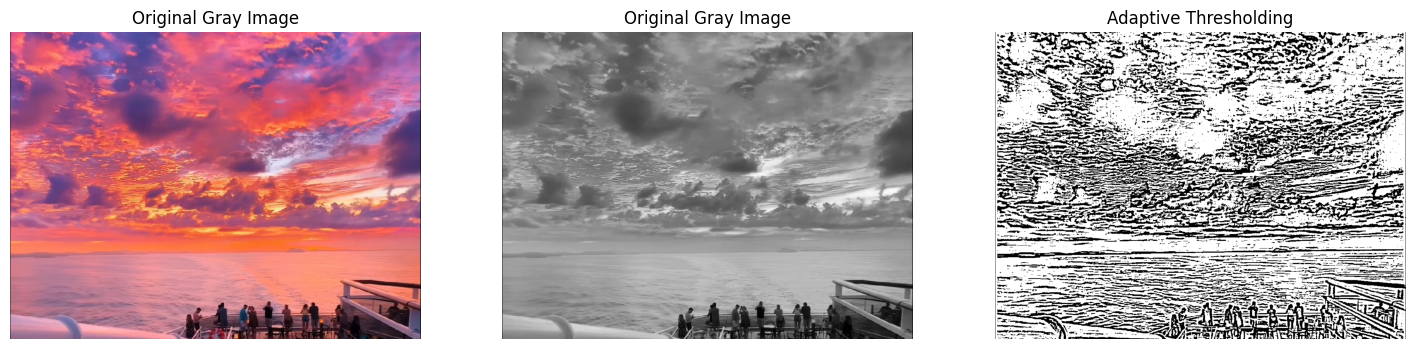

In [35]:
# 灰度和二值化
import cv2
import numpy as np
import matplotlib.pyplot as plt


# 使用OpenCV读取图像
image = cv2.imread(r"C:\Users\123456\Desktop\first.jpg")
img = cv2.imread(r"C:\Users\123456\Desktop\first.jpg")
# 检查图像是否成功加载
if image is None:
    print("Error: Image not found or the image path is incorrect.")
else:
    # 将图像转换为灰度
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 使用自适应阈值处理
    thresh_adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # 显示原始图像和自适应阈值处理后的图像
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Gray Image')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(gray, cmap='gray')
    plt.title('Original Gray Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(thresh_adaptive, cmap='gray')
    plt.title('Adaptive Thresholding')
    plt.axis('off')

    plt.show()

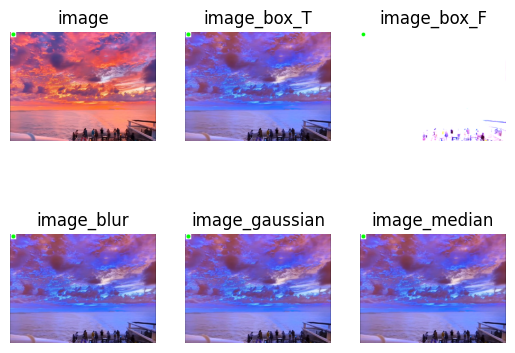

In [12]:
# 滤波
import numpy as np
import cv2  # opencv读取图像默认为BGR
import matplotlib.pyplot as plt  # matplotlib显示图像默认为RGB

image = cv2.imread(r"C:\Users\123456\Desktop\first.jpg")
cv2.rectangle(image, (5, 5), (45, 45), (255, 255, 255), -1)  # 白色矩形
cv2.circle(image, (25, 25), 15, (0, 255, 0), -1)  # 绿色圆形

image_box_T   = cv2.boxFilter(src=image, ddepth=-1, ksize=(3, 3), normalize=True)
image_box_F   = cv2.boxFilter(src=image, ddepth=-1, ksize=(3, 3), normalize=False)
image_blur    = cv2.blur(src=image, ksize=(3, 3))
image_gaussian = cv2.GaussianBlur(image, (5, 5), 1)
image_median  = cv2.medianBlur(image, 5)

plt.subplot(2, 3, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('image'), plt.axis('off')
plt.subplot(2, 3, 2), plt.imshow(image_box_T), plt.title('image_box_T'), plt.axis('off')
plt.subplot(2, 3, 3), plt.imshow(image_box_F), plt.title('image_box_F'), plt.axis('off')
plt.subplot(2, 3, 4), plt.imshow(image_blur), plt.title('image_blur'), plt.axis('off')
plt.subplot(2, 3, 5), plt.imshow(image_gaussian), plt.title('image_gaussian'), plt.axis('off')
plt.subplot(2, 3, 6), plt.imshow(image_median), plt.title('image_median'), plt.axis('off')
plt.show()



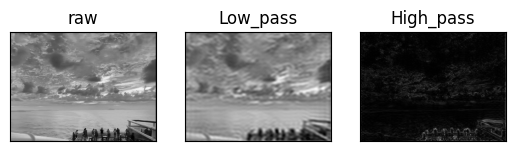

In [7]:
# 傅里叶变换
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 读取图像
img = cv2.imread(r"C:\Users\123456\Desktop\first.jpg", 0)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)                            # 傅里叶变换（np.float32 格式）
dft_shift = np.fft.fftshift(dft)                                                        # 移动到中心位置
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:, :, 0],dft_shift[:, :, 1]))    # 理解为固定公式即可
# 频谱：最中心的频率最小，像圆一样向外扩散，越来越大。# 备注：20*np.log(cv2.magnitude())

# （2）低通滤波设计
rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)                           # 获取图像中心位置

mask_low = np.zeros((rows, cols, 2), np.uint8)
mask_low[crow-30:crow+30, ccol-30:ccol+30] = 1

fshift_low = dft_shift * mask_low
f_ishift_low = np.fft.ifftshift(fshift_low)
img_low = cv2.idft(f_ishift_low)                                # 逆傅里叶变换
img_low = cv2.magnitude(img_low[:, :, 0], img_low[:, :, 1])     # 频谱图像转灰度图像

# （3）高通滤波设计
mask_high = np.ones((rows, cols, 2), np.uint8)
mask_high[crow-30:crow+30, ccol-30:ccol+30] = 0

fshift_high = dft_shift * mask_high
f_ishift_high = np.fft.ifftshift(fshift_high)
img_high = cv2.idft(f_ishift_high)                              # 逆傅里叶变换
img_high = cv2.magnitude(img_high[:, :, 0], img_high[:, :, 1])  # 频谱图像转灰度图像

# （4）显示图像
plt.subplot(131),  plt.imshow(img, cmap='gray'),                 plt.title('raw'),                    plt.xticks([]),   plt.yticks([])
plt.subplot(132),  plt.imshow(img_low, cmap='gray'),             plt.title('Low_pass'),        plt.xticks([]),   plt.yticks([])
plt.subplot(133),  plt.imshow(img_high, cmap='gray'),            plt.title('High_pass'),       plt.xticks([]),   plt.yticks([])
plt.show()




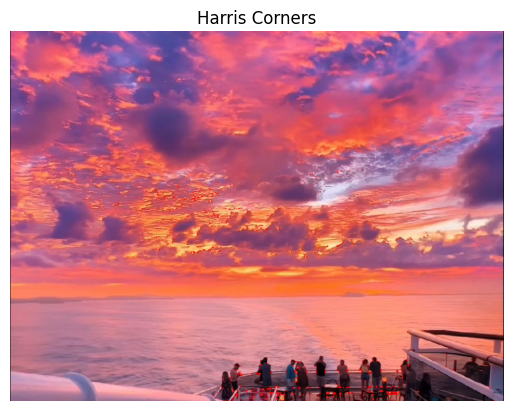

In [3]:
#角点检测
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(r"C:\Users\123456\Desktop\first.jpg")
blockSize = 2 # 检测窗口大小
ksize = 3 # Sobel的卷积核
k = 0.04 # 权重系数

# 灰度化
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Harris角点检测
dst = cv2.cornerHarris(gray,blockSize,ksize, k)
# Harris角点展示
img[dst>0.01*dst.max()] = [0, 0, 255]

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Harris Corners')
plt.axis('off')
plt.show()